# UFABC - CSM - QS2020 - Minami
# Lab9 - MIDI e IR

# Objetivos
<ol>
  <li> Tocar notas e gerar músicas simples </li>
  <li> Gerar arquivos MIDI </li>
  <li> Reproduzir arquivos MIDI </li>
  <li> Simular a reprodução em salas com Respostas Impulsivas diversas </li>
</ol>



# 1 - Tocar notas e gerar músicas simples
<ul> 
<li> Instalando Magenta </li> 
</ul>


In [1]:
#@test {"output": "ignore"}
print('Installing dependencies...')
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -qU pyfluidsynth pretty_midi

!pip install -qU magenta

# Hack to allow python to pick up the newly-installed fluidsynth lib. 
# This is only needed for the hosted Colab environment.
import ctypes.util
orig_ctypes_util_find_library = ctypes.util.find_library
def proxy_find_library(lib):
  if lib == 'fluidsynth':
    return 'libfluidsynth.so.1'
  else:
    return orig_ctypes_util_find_library(lib)
ctypes.util.find_library = proxy_find_library

print('Importing libraries and defining some helper functions...')
from google.colab import files

import magenta
import note_seq


print('🎉 Done!')
print(magenta.__version__)


Installing dependencies...
Importing libraries and defining some helper functions...
🎉 Done!
2.1.3


## Gerando TONS com NoteSequences

Everything in `Magenta` is centered around [NoteSequences](https://github.com/magenta/note-seq/blob/master/note_seq/protobuf/music.proto#L27). This is an abstract representation of a series of notes, each with different pitches, instruments and strike velocities, much like [MIDI](https://en.wikipedia.org/wiki/MIDI).

For example, this is a `NoteSequence` that represents "Twinkle Twinkle Little Star". 

In [2]:
from note_seq.protobuf import music_pb2

twinkle_twinkle = music_pb2.NoteSequence()

# Add the notes to the sequence.
twinkle_twinkle.notes.add(pitch=60, start_time=0.0, end_time=0.5, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=0.5, end_time=1.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.0, end_time=1.5, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.5, end_time=2.0, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.0, end_time=2.5, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.5, end_time=3.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=3.0, end_time=4.0, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.0, end_time=4.5, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.5, end_time=5.0, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.0, end_time=5.5, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.5, end_time=6.0, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.0, end_time=6.5, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.5, end_time=7.0, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=7.0, end_time=8.0, velocity=80) 
twinkle_twinkle.total_time = 8

twinkle_twinkle.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(twinkle_twinkle)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(twinkle_twinkle,synth=note_seq.fluidsynth)



Pode variar os tempos e as notas

## Agora com ASA BRANCA
Há um pequeno erro na melodia, procure consertá-lo!

In [3]:
# Asa Branca

asa_branca_piano = music_pb2.NoteSequence()

# CifraClub
asa_branca_piano.notes.add(pitch=72, start_time=0.0, end_time=0.5, velocity=80)
asa_branca_piano.notes.add(pitch=74, start_time=0.5, end_time=1.0, velocity=80)
asa_branca_piano.notes.add(pitch=76, start_time=1.0, end_time=1.5, velocity=80)
asa_branca_piano.notes.add(pitch=79, start_time=1.5, end_time=2.0, velocity=80)
asa_branca_piano.notes.add(pitch=79, start_time=2.0, end_time=2.5, velocity=80)
asa_branca_piano.notes.add(pitch=76, start_time=2.5, end_time=3.0, velocity=80)
asa_branca_piano.notes.add(pitch=77, start_time=3.0, end_time=4.0, velocity=80)
asa_branca_piano.notes.add(pitch=77, start_time=4.0, end_time=4.5, velocity=80)
asa_branca_piano.notes.add(pitch=72, start_time=4.5, end_time=5.0, velocity=80)
asa_branca_piano.notes.add(pitch=74, start_time=5.0, end_time=5.5, velocity=80)
asa_branca_piano.notes.add(pitch=76, start_time=5.5, end_time=6.0, velocity=80)
asa_branca_piano.notes.add(pitch=79, start_time=6.0, end_time=6.5, velocity=80)
asa_branca_piano.notes.add(pitch=79, start_time=6.5, end_time=7.0, velocity=80)
asa_branca_piano.notes.add(pitch=77, start_time=7.0, end_time=8.0, velocity=80) 
asa_branca_piano.notes.add(pitch=76, start_time=8.0, end_time=8.5, velocity=80)
asa_branca_piano.notes.add(pitch=72, start_time=8.5, end_time=9.0, velocity=80)
asa_branca_piano.notes.add(pitch=72, start_time=9.0, end_time=9.5, velocity=80)
asa_branca_piano.notes.add(pitch=74, start_time=9.5, end_time=10.0, velocity=80)

asa_branca_piano.notes.add(pitch=76, start_time=10.0, end_time=10.5, velocity=80)
asa_branca_piano.notes.add(pitch=79, start_time=10.5, end_time=11.0, velocity=80)
asa_branca_piano.notes.add(pitch=79, start_time=11.0, end_time=11.5, velocity=80)
asa_branca_piano.notes.add(pitch=77, start_time=11.5, end_time=12.0, velocity=80)
asa_branca_piano.notes.add(pitch=76, start_time=12.0, end_time=12.5, velocity=80)
asa_branca_piano.notes.add(pitch=72, start_time=12.5, end_time=13.0, velocity=80)
asa_branca_piano.notes.add(pitch=77, start_time=13.0, end_time=13.5, velocity=80)
asa_branca_piano.notes.add(pitch=77, start_time=13.5, end_time=14.0, velocity=80)
asa_branca_piano.notes.add(pitch=76, start_time=14.0, end_time=14.5, velocity=80)
asa_branca_piano.notes.add(pitch=74, start_time=14.5, end_time=15.0, velocity=80)
asa_branca_piano.notes.add(pitch=74, start_time=15.0, end_time=16.0, velocity=80) 
asa_branca_piano.notes.add(pitch=76, start_time=16.0, end_time=17.5, velocity=80)  
asa_branca_piano.notes.add(pitch=74, start_time=17.5, end_time=18.0, velocity=80)
asa_branca_piano.notes.add(pitch=74, start_time=18.0, end_time=19.0, velocity=80) 
asa_branca_piano.notes.add(pitch=72, start_time=19.0, end_time=19.5, velocity=80)  
asa_branca_piano.notes.add(pitch=72, start_time=19.5, end_time=20.0, velocity=80)  
asa_branca_piano.total_time = 20.0

asa_branca_piano.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(asa_branca_piano)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(asa_branca_piano,synth=note_seq.fluidsynth)



Pode usar outro instrumento. Por exemple, uma bateria 

In [4]:
drums = music_pb2.NoteSequence()

drums.notes.add(pitch=36, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=38, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=46, start_time=0, end_time=0.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.25, end_time=0.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.375, end_time=0.5, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.5, end_time=0.625, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=50, start_time=0.5, end_time=0.625, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=36, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=38, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=45, start_time=0.75, end_time=0.875, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=36, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=46, start_time=1, end_time=1.125, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=42, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=48, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.notes.add(pitch=50, start_time=1.25, end_time=1.375, is_drum=True, instrument=10, velocity=80)
drums.total_time = 1.375

drums.tempos.add(qpm=60)

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(drums)


# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(drums,synth=note_seq.fluidsynth)

# * Agora "Escreva" uma música simples, e toque-a

# 2. Gerando arquivos MIDI: `NoteSequence` ->  MIDI

When you called the "play_sequence" method above, this converted the `NoteSequence` to MIDI, and created an HTML widget to play it. This method is specially made for colab notebooks, so it won't work inside your Python script. That method uses the Magenta built-in [conversion methods](https://github.com/magenta/note-seq/blob/master/note_seq/midi_io.py#L51), which you can use in your python script:

In [5]:
L_theme = music_pb2.NoteSequence()
# https://www.youtube.com/watch?v=qR6dzwQahOM

# Add the notes to the sequence.
# 0.2
#75-83

L_theme.notes.add(pitch=75+5, start_time=0.0, end_time=0.23, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=0.23, end_time=0.46, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=0.46, end_time=0.69, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=0.69, end_time=0.92, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=0.92, end_time=1.15, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=1.15, end_time=1.38, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=1.38, end_time=1.61, velocity=80)
L_theme.notes.add(pitch=75+9, start_time=1.61, end_time=1.84, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=1.84, end_time=2.07, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=2.07, end_time=2.30, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=2.30, end_time=2.53, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=2.53, end_time=2.76, velocity=80)
L_theme.notes.add(pitch=75+0, start_time=2.76, end_time=2.99, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=2.99, end_time=3.22, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=3.22, end_time=3.45, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=3.45, end_time=3.68, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=3.68, end_time=3.91, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=3.91, end_time=4.14, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=4.14, end_time=4.37, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=4.37, end_time=4.60, velocity=80)
L_theme.notes.add(pitch=75+9, start_time=4.60, end_time=4.83, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=4.83, end_time=5.06, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=5.06, end_time=5.29, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=5.29, end_time=5.52, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=5.52, end_time=5.75, velocity=80)
L_theme.notes.add(pitch=75+0, start_time=5.75, end_time=5.98, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=5.98, end_time=6.21, velocity=80)
##_______________________________________6.21, end_time=0.00
L_theme.notes.add(pitch=75+5, start_time=6.21, end_time=6.44, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=6.44, end_time=6.67, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=6.67, end_time=6.90, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=6.90, end_time=7.13, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=7.13, end_time=7.36, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=7.36, end_time=7.59, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=7.59, end_time=7.82, velocity=80)
L_theme.notes.add(pitch=75+9, start_time=7.82, end_time=8.05, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=8.05, end_time=8.28, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=8.28, end_time=8.51, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=8.51, end_time=8.74, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=8.74, end_time=8.97, velocity=80)
L_theme.notes.add(pitch=75+0, start_time=8.97, end_time=9.20, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=9.20, end_time=9.43, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=9.43, end_time=9.66, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=9.66, end_time=9.89, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=9.89, end_time=10.12, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=10.12, end_time=10.35, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=10.35, end_time=10.58, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=10.58, end_time=10.81, velocity=80)
L_theme.notes.add(pitch=75+9, start_time=10.81, end_time=11.04, velocity=80)
L_theme.notes.add(pitch=75+7, start_time=11.04, end_time=11.27, velocity=80)
L_theme.notes.add(pitch=75+5, start_time=11.27, end_time=11.50, velocity=80)
L_theme.notes.add(pitch=75+4, start_time=11.50, end_time=11.73, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=11.73, end_time=11.96, velocity=80)
L_theme.notes.add(pitch=75+0, start_time=11.96, end_time=12.19, velocity=80)
L_theme.notes.add(pitch=75+2, start_time=12.19, end_time=12.42, velocity=80)

L_theme.total_time = 12.42

L_theme.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(L_theme)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(L_theme,synth=note_seq.fluidsynth)

# * Salve a sua "composição" musical

In [6]:
# This creates a file called ``, containing the drums solo we've been using.
note_seq.sequence_proto_to_midi_file(L_theme, 'L_theme.mid')

# This is a colab utility method to download that file. In your Python script, you 
# would just write it to disk.
files.download('L_theme.mid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Useful helpers
There are a lot of other helper methods sprinkled around the `note_seq` codebase that you might need but not know where to find. Here are some of our favourites:

- [converting](https://github.com/magenta/note-seq/blob/master/note_seq/midi_io.py) between MIDI and NoteSequences
- [trimming, concatenating and expanding](https://github.com/magenta/note-seq/blob/master/note_seq/sequences_lib.py) NoteSequences
- [colab notebook](https://github.com/magenta/note-seq/blob/master/note_seq/notebook_utils.py) utils

# 3. Reproduzindo Arquivos MIDI

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
os.chdir("/content/drive/MyDrive/UFABC2019/CSM/lab9")

Carregando MIDI

In [9]:
midi_file = note_seq.midi_file_to_note_sequence('chpn_op7_1_format0.mid')
# Handle sustain pedal in midi_file
midi_file = note_seq.apply_sustain_control_changes(midi_file)
note_seq.play_sequence(
    midi_file,
    synth=note_seq.fluidsynth, sample_rate=22050)
note_seq.plot_sequence(midi_file)

# 4. Tocando a música em alguns ambientes

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import librosa
import librosa.display
import IPython.display

In [11]:
# Resposta Impulsiva de uma capela de Igreja
ir_chapel, sr_chapel = librosa.load('stalbans_omni.wav', mono = True, sr = 96000)

In [12]:
# Normalização da IR
ir_chapel = librosa.util.normalize(ir_chapel)

In [13]:
IPython.display.Audio(ir_chapel, rate = sr_chapel)

Text(0.5, 1.0, 'IR de uma capela')

<Figure size 432x288 with 0 Axes>

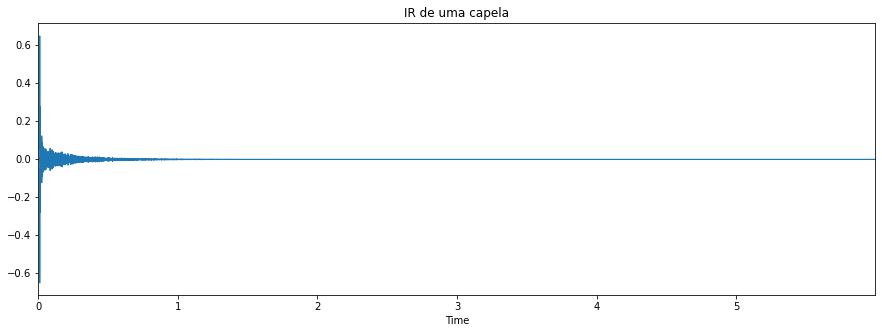

In [14]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveplot(ir_chapel, sr=sr_chapel)
plt.title('IR de uma capela')

In [15]:
# "Tocando" Chopin na Capela

In [16]:
Mazurca, sr_Mazurca = librosa.load('Mazurca_Chopin_opus7_no1_with_pedal.wav', mono = True, sr = 22050)

In [17]:
Mazurca = librosa.util.normalize(Mazurca)

In [18]:
#reproducao_Chopin_chapel = np.convolve(Mazurca, ir_chapel, mode = 'full')
#IPython.display.Audio(reproducao_Chopin_chapel, rate = sr_Mazurca)


Text(0.5, 1.0, 'IR de uma Sala de Concertos')

<Figure size 432x288 with 0 Axes>

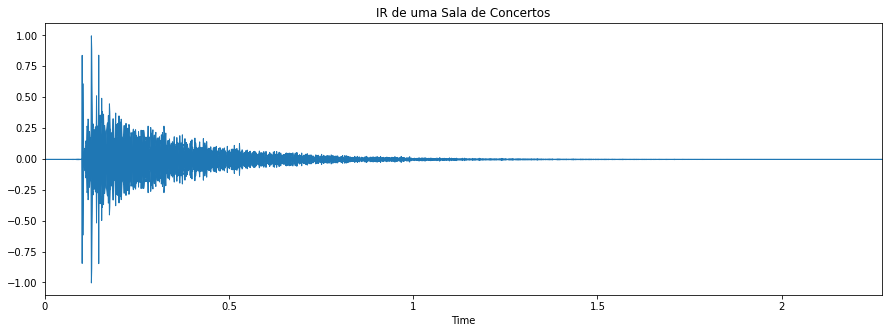

In [20]:
# "Tocando" numa Sala de Concertos
ir_hall, sr_hall = librosa.load('usina_main_s1_p5.wav', mono = True, sr = 48000)
ir_hall = librosa.util.normalize(ir_hall)
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveplot(ir_hall, sr=sr_hall)
plt.title('IR de uma Sala de Concertos')

In [21]:
IPython.display.Audio(ir_hall, rate = sr_hall)

In [ ]:
#reproducao_Chopin_hall = np.convolve(Mazurca, ir_hall, mode = 'full')
#IPython.display.Audio(reproducao_Chopin_hall, rate = sr_Mazurca)


## * Reproduza a sua música neste dois ambientes diferentes

In [22]:
midi_file = note_seq.midi_file_to_note_sequence('L_theme.mid')
# Handle sustain pedal in midi_file
midi_file = note_seq.apply_sustain_control_changes(midi_file)
note_seq.play_sequence(
    midi_file,
    synth=note_seq.fluidsynth, sample_rate=22050)
note_seq.plot_sequence(midi_file)

In [25]:
L_t, sr_L_t = librosa.load('L_theme.wav', mono = True, sr = 22050)
IPython.display.Audio(L_t, rate = sr_L_t)

In [26]:
L_theme_chapel = np.convolve(L_t, ir_chapel, mode = 'full')
IPython.display.Audio(L_theme_chapel, rate = sr_L_t)

In [27]:
L_theme_hall = np.convolve(L_t, ir_hall, mode = 'full')
IPython.display.Audio(L_theme_hall, rate = sr_L_t)

# 5. Relatório
### a) Apresentem as músicas de todos os integrantes do grupo, identificando quem "criou" cada uma;
### b) Pesquise numa base de dados aberta como: https://www.openair.hosted.york.ac.uk/?page_id=36, e encontre três IRs de ambientes diferentes (pequeno-fechado, auditório médio, igreja grande);
### c) "Criar" mais uma música (de maior duração) e "reproduzi-la" em cada ambiente, comentando as diferenças;
### d) Repita o mesmo procedimento (c) para um outro .midi que desejar (da web).
# -X-X-X-